===== Question 1: Methane Combustion =====
Oxygen is in excess by 96.00 kmol/hr.
Total heat released: -9627.60 kJ/hr (exothermic)

===== Question 2: Ethylbenzene Dehydrogenation =====
New equilibrium constant at 950 K: 0.2571
Estimated conversion: 20.45%

===== Question 3: Cis-to-Trans Isomerization =====
Conversion of cis-2-butene: 20.55%
Reactor height: 5.00 meters

===== Plotting Isomerization Conversion =====


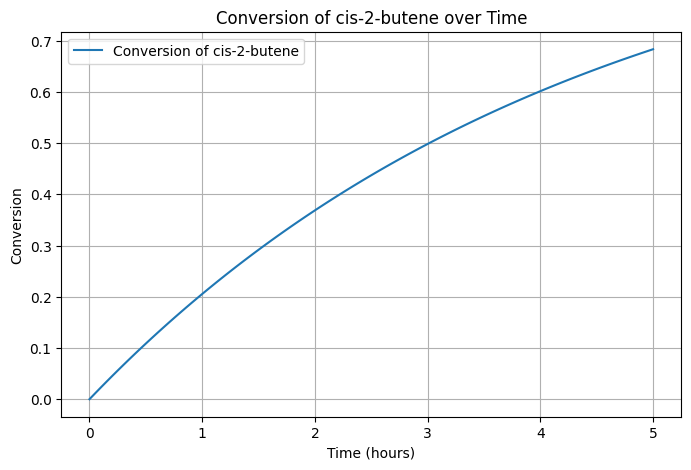


===== Plotting HYSYS Process Structure =====


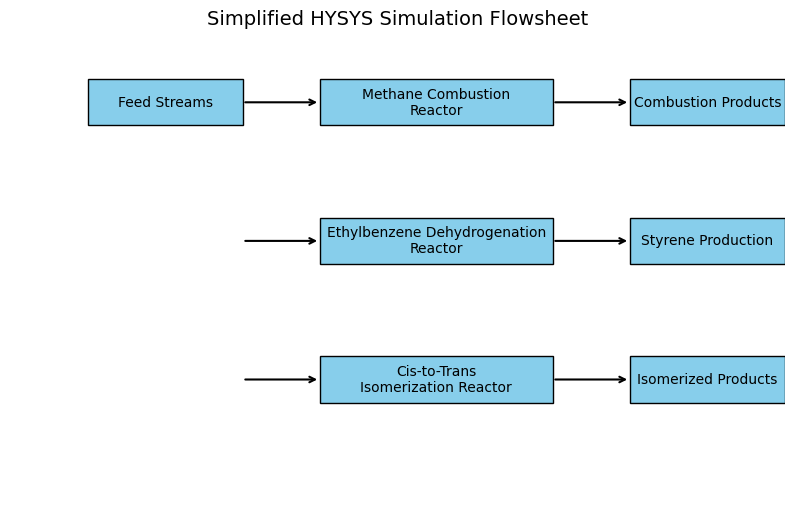

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Question 1: Methane Combustion
def methane_combustion():
    # Constants
    n_CH4 = 12  # kmol/hr of CH4 (Methane)
    n_O2 = 120  # kmol/hr of O2 (Oxygen)
    delta_H_combustion = -802.3  # kJ/mol for combustion of CH4 (heat of combustion)

    # Stoichiometric calculation: CH4 + 2O2 → CO2 + 2H2O
    reaction_stoichiometry_O2 = 2  # 2 moles of O2 per 1 mole CH4
    mol_O2_required = n_CH4 * reaction_stoichiometry_O2

    # Check if oxygen is in excess
    if n_O2 >= mol_O2_required:
        excess_O2 = n_O2 - mol_O2_required
        print(f"Oxygen is in excess by {excess_O2:.2f} kmol/hr.")
    else:
        print("Methane is in excess.")

    # Energy released during combustion
    total_heat_released = delta_H_combustion * n_CH4  # kJ/hr
    print(f"Total heat released: {total_heat_released:.2f} kJ/hr (exothermic)")

    # Phase determination based on energy (this requires HYSYS for precise results)
    # In a high-temperature combustion reaction, the products are usually in vapor phase.

# Question 2: Ethylbenzene Dehydrogenation to Styrene
def equilibrium_constant(delta_H_r, R, T1, T2, K_eq_T1):
    """ Calculate the equilibrium constant at a new temperature T2 using the Van't Hoff Equation. """
    return K_eq_T1 * np.exp((-delta_H_r / R) * (1/T2 - 1/T1))

def ethylbenzene_dehydrogenation():
    # Constants for equilibrium calculation
    delta_H_reaction = 117.0 * 1000  # Heat of reaction in J/mol
    R = 8.314  # J/mol K
    T1 = 850  # Initial temperature in K
    T2 = 950  # Final temperature in K (example)
    K_eq_T1 = 0.045  # Equilibrium constant at T1 (example)

    # Calculate new equilibrium constant
    K_eq_T2 = equilibrium_constant(delta_H_reaction, R, T1, T2, K_eq_T1)
    print(f"New equilibrium constant at {T2} K: {K_eq_T2:.4f}")

    # Conversion is typically calculated using HYSYS, but here we can estimate using an example method
    conversion = 1 - (1 / (1 + K_eq_T2))  # Simplified conversion approximation
    print(f"Estimated conversion: {conversion * 100:.2f}%")

# Question 3: Cis-2-Butene to Trans-2-Butene Isomerization
def cis_to_trans_isomerization():
    # First-order reaction kinetics (simplified)
    A = 0.23  # Frequency factor (lbmol/...) (assumed units)
    k = A  # Reaction rate constant (simplified, assuming zero activation energy)

    # Conversion calculation for first-order kinetics
    conversion_time = 1  # Reaction time in hours (example)
    conversion = 1 - np.exp(-k * conversion_time)
    print(f"Conversion of cis-2-butene: {conversion * 100:.2f}%")

    # Reactor dimensions (simplified height calculation based on volume and cross-section area)
    reactor_volume = 0.1  # m³ (given in question)
    cross_sectional_area = 0.02  # m² (assumed for demonstration)
    reactor_height = reactor_volume / cross_sectional_area
    print(f"Reactor height: {reactor_height:.2f} meters")

# Plotting the conversion over time for isomerization
def plot_isomerization_conversion():
    time = np.linspace(0, 5, 100)  # Time range from 0 to 5 hours
    A = 0.23  # Frequency factor
    conversion = 1 - np.exp(-A * time)  # First-order reaction conversion

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(time, conversion, label='Conversion of cis-2-butene')
    plt.xlabel('Time (hours)')
    plt.ylabel('Conversion')
    plt.title('Conversion of cis-2-butene over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting a simplified HYSYS process structure (flowsheet)
def plot_hysys_structure():
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')

    # Define boxes as (x, y, width, height)
    boxes = {
        "Feed Streams": (1, 8, 2, 1),
        "Methane Combustion\nReactor": (4, 8, 3, 1),
        "Combustion Products": (8, 8, 2, 1),
        "Ethylbenzene Dehydrogenation\nReactor": (4, 5, 3, 1),
        "Styrene Production": (8, 5, 2, 1),
        "Cis-to-Trans\nIsomerization Reactor": (4, 2, 3, 1),
        "Isomerized Products": (8, 2, 2, 1)
    }

    # Draw boxes and add text
    for label, (x, y, w, h) in boxes.items():
        rect = plt.Rectangle((x, y), w, h, facecolor='skyblue', edgecolor='black')
        ax.add_patch(rect)
        ax.text(x + w/2, y + h/2, label, ha='center', va='center', fontsize=10)

    # Define arrow properties
    arrow_args = dict(facecolor='black', arrowstyle="->", linewidth=1.5)

    # Draw arrows connecting boxes
    # Arrow from Feed Streams to Methane Combustion Reactor
    ax.annotate("", xy=(4, 8.5), xytext=(3, 8.5), arrowprops=arrow_args)
    # Arrow from Methane Combustion Reactor to Combustion Products
    ax.annotate("", xy=(8, 8.5), xytext=(7, 8.5), arrowprops=arrow_args)

    # Arrow from Feed Streams to Ethylbenzene Dehydrogenation Reactor
    ax.annotate("", xy=(4, 5.5), xytext=(3, 5.5), arrowprops=arrow_args)
    # Arrow from Ethylbenzene Dehydrogenation Reactor to Styrene Production
    ax.annotate("", xy=(8, 5.5), xytext=(7, 5.5), arrowprops=arrow_args)

    # Arrow from Feed Streams to Cis-to-Trans Isomerization Reactor
    ax.annotate("", xy=(4, 2.5), xytext=(3, 2.5), arrowprops=arrow_args)
    # Arrow from Cis-to-Trans Isomerization Reactor to Isomerized Products
    ax.annotate("", xy=(8, 2.5), xytext=(7, 2.5), arrowprops=arrow_args)

    plt.title("Simplified HYSYS Simulation Flowsheet", fontsize=14)
    plt.show()

# Running all the required calculations and plotting
print("===== Question 1: Methane Combustion =====")
methane_combustion()

print("\n===== Question 2: Ethylbenzene Dehydrogenation =====")
ethylbenzene_dehydrogenation()

print("\n===== Question 3: Cis-to-Trans Isomerization =====")
cis_to_trans_isomerization()

print("\n===== Plotting Isomerization Conversion =====")
plot_isomerization_conversion()

print("\n===== Plotting HYSYS Process Structure =====")
plot_hysys_structure()
